# Mercado de Valores - Simulacion Computacional
## Simulacion Computacional - Universidad de Santiago de Chile

### Descripción de la problemática general.
El mercado de valores puede es volatil dado la enorme cantidad de productos en oferta asi como, noticias, politicas economicas y conflictos entre empresas y naciones. El principal objetivo del mercado de valores es el de ayudar al movimiento de capitales, contribuyendo de esta forma en la estabilidad monetaria y financiera. Es así como el uso democrático de los mercados de valores impulsa el desarrollo de políticas monetarias más activas y seguras. El mercado de valores es de una gran importancia en la económica nacional e internacional por tener las siguientes funciones:

    * Contribuye al desarrollo económico al canalizar el ahorro hacia la inversión.
    * Brinda liquidez a la inversión, permitiendo que los portadores de títulos puedan convertir en dinero sus acciones.
    * Coloca en contacto a las empresas y las entidades del Estado que necesitan recursos de inversión de ahorradores.
    * Favorecen la valoración de activos financieros y la asignación eficiente de los recursos.

El mercado es una parte fundamental de la economia de un pais, ser capaz de analizarlo y dar modelos que puedan predecir su comportamiento. El analisis prescriptivo conlleva la aplicacion de ciencias de la computacion y matematicas y sugiere decisiones para tomar ventajas de los resultados. Los participantes inlcuye inversores individuales, instituciones como son bancos, fondos de inversion, compañias de seguros.

El mercado tiene muchos jugadores y muchos bienes a su disposicion, entre tantos factores y variables ser capaz de tener una simulacion del tablero ayudara a entender su comportamiento y experimentar modelos que logren una ventaja en el mercado.

### Enunciar las variables aleatorias que son de interés en el modelamiento.

Un acción es un tipo de bien que da la propiedad de un porcentaje de alguna compañia. Esto permite al beneficiario de tal acción tener una parte de los activos de la empresa y sus ganancias. Acciones son vendidas y compradas en el mercado, aunque pueden ocurrir compras privadas tambien. Los valores de las acciones varian segun que tan confiable sea la compañia a la cual pertenecen las acciones, escandalos, noticias, regulaciones gubernamentales afectan su valor, haciendo el mercado aun mas volatil. 

El valor de una compañia determina el precio de sus acciones, este valor es tanto por sus bienes materiales como por la confianza que tiene el mercado en ella, una confianza que puede ser dañada y asi afectando el precio que llegan a tener a traves del tiempo, el mercado siempre esta en movimiento.

Las variables precio y tiempo se usan visualizar el mercado, el valor de las acciones varia a traves del tiempo, modelos dan un posible valor dentro de un error.

### Dar un flujo o secuenciación natural al problema.

<img src="diag.png" style="height:222px;">

Inversores compran acciones que se esten comerciando en el mercado, estas transacciones siguen las normas y politicas que tenga establecidas el gobierno al que pertenece el mercado. Las compañias ofrecen sus acciones la venta, los precios de estas varian a traves del tiempo. Esas variaciones son las que deben ser analizadas y simuladas.

### Describir la simulación en eventos discretos que se realizaría a través del modelo.
   La simulacion seria los precios que tengan las acciones cada dia, siendo cada dia el intervalo discreto que usaremos. Utilizando los precios de dias anteriores podemos tener una expectativa de lo que sucedera en dias siguientes.
    
### Dar una posible salida de la simulación.
La salida de la simulacion puede ser los valores que tendra el precio de las acciones que estamos simulando en un periodo de tiempo que podria ser una semana. 

### Reconocer las métricas para la validación del sistema.
Al pasar los dias podemos recuperar los precios reales que tuve el mercado, entonces verificar que tanto error tuvo nuestro modelos. Esta validacion con los datos reales puede comprobar que tan bueno es nuestra simulacion.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plot and charts
print("Libraries Load done.")

Libraries Load done.


In [3]:
# Cargando datos
df = pd.read_csv("GOOGL_data.csv")
print("Data done.")

Data done.


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL
(1259, 7)
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [5]:
print(df.describe())

              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    682.357041   687.362776   676.691790   682.233847  2.457501e+06
std     187.409986   188.531563   186.265742   187.573892  1.591432e+06
min     384.964600   390.164800   381.010700   383.340000  5.211410e+05
25%     543.660000   547.585000   539.200000   543.022500  1.456867e+06
50%     651.570000   658.255500   642.165000   652.470000  1.938260e+06
75%     805.960000   810.739500   801.565000   806.400000  3.031624e+06
max    1188.000000  1198.000000  1184.060000  1187.560000  2.314537e+07


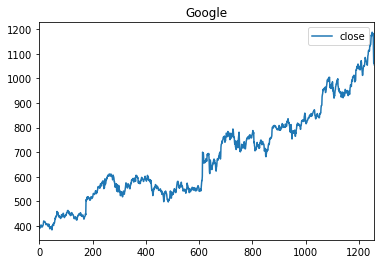

In [10]:
df[['close']].plot()
plt.title("Google")
plt.show()

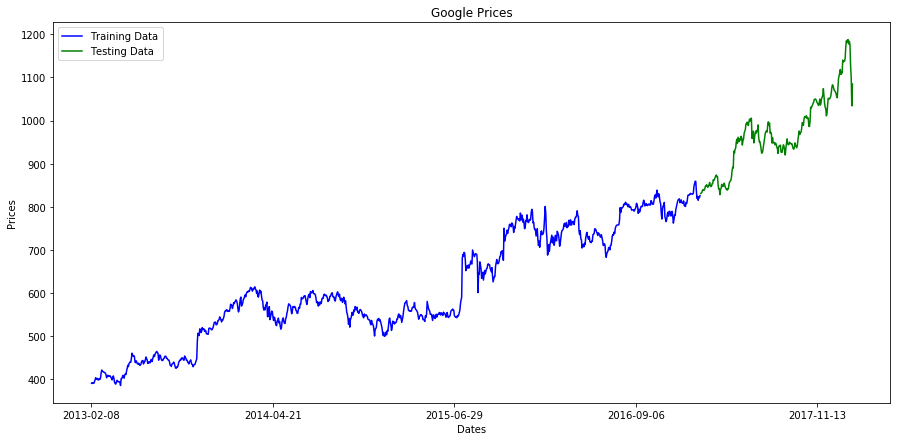

In [13]:
# Separamos los datos 80% y 20% 
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
# Tamano del grafico
plt.figure(figsize=(15,7))
# Configuracion del grafico
plt.title('Google Open Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
# Plotting
plt.plot(train_data['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
# Eje x con las fechas
plt.xticks(np.arange(0,1258, 300), df['date'][0:1258:300])
plt.legend()



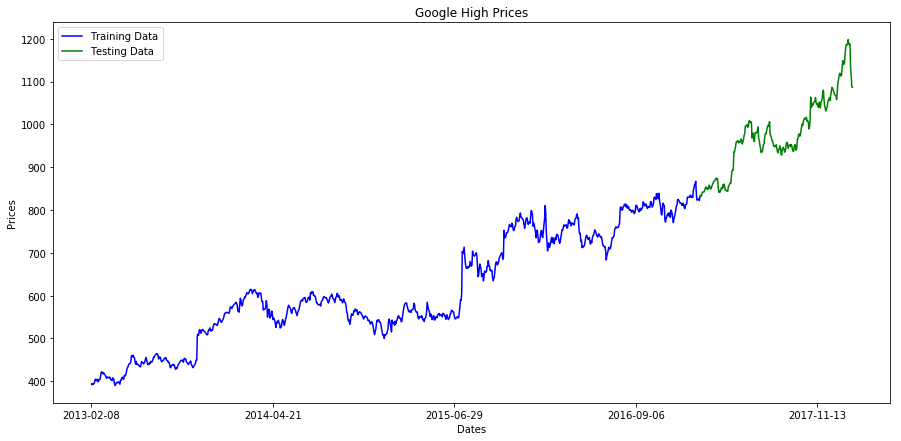

In [14]:
# Separamos los datos 80% y 20% 
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
# Tamano del grafico
plt.figure(figsize=(15,7))
# Configuracion del grafico
plt.title('Google High Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
# Plotting
plt.plot(train_data['high'], 'blue', label='Training Data')
plt.plot(test_data['high'], 'green', label='Testing Data')
# Eje x con las fechas
plt.xticks(np.arange(0,1258, 300), df['date'][0:1258:300])
plt.legend()


Referencias.

Evans, James R. & Lindner, Carl H. (March 2012). "Business Analytics: The Next Frontier for Decision Sciences". Decision Line. 43 (2).

https://github.com/guyz/HMM/blob/master/hmm/_BaseHMM.py
https://github.com/elena-sharova/HiddenMarkovModel/blob/master/HMM.py
https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/simulation/mcmc-stock-market.ipynb